In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 7.3 MB/s 
     |████████████████████████████████| 6.5 MB 39.3 MB/s 
     |████████████████████████████████| 67 kB 5.8 MB/s 
     |████████████████████████████████| 895 kB 41.0 MB/s 
     |████████████████████████████████| 596 kB 39.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install wordsegment

     |████████████████████████████████| 4.8 MB 23.1 MB/s 


In [ ]:
!pip install pyyaml h5py

In [ ]:
import numpy as np

import random

import os, json

import pandas as pd
pd.options.display.max_colwidth = 200

import tensorflow as tf
import tensorflow_datasets as tfds

import transformers

from transformers import BertTokenizer, TFBertModel, TrainingArguments, Trainer
from tensorflow.keras import backend as K

from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

import re

import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
tf.config.list_physical_devices('TPU')

[]

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
transformers.__version__

'4.17.0'

In [ ]:
#Import data from Google drive
from google.colab import drive
drive.mount('/content/gdrive')

hindi_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks (1)/Data_Hindi_New/hindi_train.csv'
                       )

hindi_dev = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks (1)/Data_Hindi_New/hindi_dev.csv'
                       )

hindi_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks (1)/Data_Hindi_New/hindi_test.csv'
                       )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
hindi_train

,text,label
0,"RT @RishiPrasadOrg: ईश्वर किसीको प्राप्त नहीं होता, ब्रह्म किसीको प्राप्त नहीं होता बल्कि प्राप्त हुआ-सा लगता है।वह भी किसको? जिसको नहीं मि…",0
1,@BBCHindi इसे कहते हैं खतरो का खिलाड़ी।,0
2,७० साल जतन के ७ साल पतन के #IndiaCovidCrisis,0
3,"RT @AagayiNavya: चंपारण में एक चीनी मिल बंद पड़ी थी,२०१४ में मोदी ने कहा था अब यहां तभी आऊंगा जब इसी चीनी मिल की चीनी से चाय पियूंगा...\nआज…",1
4,सिर्फ़ सरकारें बदलती हैं हालात नहीं बदलते l \nकांग्रेस शासित राजस्थान की जेल में फिर एक मुसलमान \nक़ैदी की हत्या (लिंचिंग) l \n कांग्रेस शासन में राजस्थान में तीसरी लिंचिंग हो गई\nकांग्रेस सिर्फ भ...,1
...,...,...
4230,आज़ाद ख़याल वो नहि वो फूहड़ हो आज़ाद ख़याल वो जो हक़ीक़त को #बज्म,0
4231,चलो वक़्त में थोड़ा ठहर के देखे ~~ @niksism6 --&gt;&gt; my thoughts on the YourQuote app at https://t.co/PEVD4AjLw8 --&gt;&gt; Retweet If You Like this।। #niksismwrites✍️ #CoronaPandemic #...,0
4232,"RT @PihuTyagi_: लोगों के काम आते रहिये क्योंकि ,क़ुदरत का एक उसूल है कि...\n\nजिस कुंए से लोग पानी पीते रहे ,वो कभी सूखता नही है ...!!…",0
4233,"1 आदमीं को मारने पर गोडसे आतंकी हो सके है तो\n17000 सिखो, 5000 भोपाली, 3000 तमिलों का कत्लेआम करवाने वाला भारत रत्न कैसे हो सके है?",1


In [ ]:
hindi_dev

,text,label
0,"#ModiKaVaccineJumla जुमला वाला प्रधानमंत्री, जैसी करनी वैसी भरनी। लोग जात पात पर वोट करते हैं तो उसे भोंखने वाला कुत्ता ही मिलेगा या फिर बददिमाग गधा नाकि कोई अच्छा इंसानियत का हुनर रखने वाला नेता।",1
1,Mar javunga aaj me khushi me 😍😍,0
2,"RT @Sonam_Mumbaikar: तेरे इश्क़ में हद से गुजर जाऊं\n\nमैं झूठ कहूं तो, मर जाऊं...😍\n\n@Sonam_Mumbaikar",0
3,@Physicsgaurav Ye sale pde likhe chutiya hai 😜🤘,1
4,@RachnaSinghSP अरे चाची हो चाची.. जब सैफई में रंडी नचा के नकटेढवा देश के बर्बाद करत रहल तब तोहार जुनून कहाँ रहल हो चाची... खालीभर बकलोली करय जानेलू ये चाची.... 🤣🤣🤣🤣,1
...,...,...
524,"RT @qshaikhu: @attorneybharti भाजपा वाले तो अपना टेबल भी लेकर निकल लिए, फ्रूटी की खाली बोटल छोड़कर, स्वच्छ भारत मैं अपना योगदान देकर । htt…",1
525,"RT @BJP4India: भ्रष्टाचार हो, महंगाई हो या 1984 में हजारों सिखों का कत्ल हुआ हो इनका जवाब यही होता है- 'हुआ तो हुआ'।\n\nजिस अहंकार में ये लोग…",1
526,"शुक्रिया इमरान प्रताप गढ़ी साहेब शुक्रिया अमनातुल्लह साहेब ,, इस दुख की घड़ी में ओसामा शहाब का साथ देने के लिए साथ खड़े होने के लिए,,उन लोगों का भी बहुत शुक्रिया जो दिल्ली में ओसामा भाई के साथ खड...",0
527,#bengalviolence Be careful everyone. Some unscrupulous people are posting these pictures on social media to spread tension in the state and the country. #CovidIndia #COVIDEmergencyIndia #ममता_की_...,0


In [ ]:
hindi_test

,text,label
0,"@zishanAliRJD @iAnantSingh_ *ओसामा साहब ने सिर्फ उस ट्वीट और ट्विटर अकाउंट को फर्जी बताया है ना कि राजद का पक्ष लिए और ना की राजद का गुणगान किये है, संयम रखिए जल्द ही सब कुछ सामने आएगा।* #JusticeF...",0
1,"@China_Amb_India @narendramodi I am shocked they didn't mention a line (Karam, you have been our worst sufferer) (करम हमारे ख़राब ह भुगत आप रहे ह) #wohanvirus #chinesevirus",0
2,कल से 18 से ऊपर वालो को हवा की वैक्सीन लगेगी... #ModiKaVaccineJumla,0
3,इधर की बात उधर करने में \nआज भी जीमेल से आगे है \nफीमेल!!!,0
4,☯️ मोदी जी ➡️ सोंगंद मुझे इस मिट्टी की मै देश नहीं मिटने दूंगा मै देश नहीं झुकने दूंगा !! और हमने भैंचोद ये बात सीरियस लेली!!!! ले कोरॉना➡️ सालो अब भुगतो 👹 #ModiMustResign #ModiKaVaccineJumla,1
...,...,...
525,"हे प्रभु!! निंदा????? नेताओं की , और सरकारों के निकम्मेपन को छुपाने के लिए एक शब्द काफी है ""निंदा"" । #BengalBurning https://t.co/FcFx0eTSW0",1
526,"अगर आपको पाकिस्तान या बांग्लादेश के हिंदुओं की चिंता होती है की उनके साथ वहा गलत हो रहा है और आप उनको भारत बुलाना चाहते हो, भारत बुला के भी करोगे क्या? भारत के हिंदुओ का घर लूटा जा रहा है, हिंदू म...",1
527,RT @SHIVANI92_: क्या ऐसा करना चाहिए? अपना विचार जरुर कमेंट करें।\n@cp4bhai @MLArajeshSP @ShivaYa36977421 @Narendryadav01 @0359R @AshishS5185…,0
528,RT @pravinj14696933: राजीव ने बोफोर्स खाया हैं\nसोनिया ने खाया था अगस्ता\nवाड्रा ने ज़मीन हड़पी हैं\nराहुल ने हेरॉल्ड डकारा थां\n\nइंदिरा ने इमर…,1


In [ ]:
# # Function to pre-process tweets


# def clean_tweet(tweet):
#   tweet = re.sub(r"\B@\w+", "USERNAME", tweet) #Replace Username
#   tweet = re.sub(r"http\S+", "", tweet) # Remove url

#   hashtags = re.findall(r"(#\w+)", tweet)
#   for hs in hashtags:
#     words = " ".join(ws.segment(hs))
#     if len(words) > 0:
#       tweet = tweet.replace(hs, words)
#     else:
#       tweet = tweet.replace(hs, hs[1:])
  
#   return tweet


In [ ]:
# Specify tokenzer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
mbert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#Tokenize text, see next cell for choice of max_length
max_length = 225



#Hindi
hindi_x_train = tokenizer(list(hindi_train.text), 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')
hindi_y_train = hindi_train.label

hindi_x_dev = tokenizer(list(hindi_dev.text), 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')
hindi_y_dev = hindi_dev.label

hindi_x_test = tokenizer(list(hindi_test.text), 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')
hindi_y_test = hindi_test.label

In [ ]:
## Clean tweets and then tokenize text

# hindi_train_cleaned = hindi_train
# hindi_train_cleaned.text = hindi_train.text.apply(clean_tweet)

# hindi_dev_cleaned = hindi_dev
# hindi_dev_cleaned.text = hindi_dev.text.apply(clean_tweet)

# hindi_test_cleaned = hindi_test
# hindi_test_cleaned.text = hindi_test.text.apply(clean_tweet)

# #Hindi
# hindi_x_train_cleaned = tokenizer(list(hindi_train_cleaned.text), 
#               max_length=max_length,
#               truncation=True,
#               padding='max_length', 
#               return_tensors='tf')
# hindi_y_train_cleaned = hindi_train_cleaned.label

# hindi_x_dev_cleaned = tokenizer(list(hindi_dev_cleaned.text), 
#               max_length=max_length,
#               truncation=True,
#               padding='max_length', 
#               return_tensors='tf')
# hindi_y_dev_cleaned = hindi_dev_cleaned.label

# hindi_x_test_cleaned = tokenizer(list(hindi_test_cleaned.text), 
#               max_length=max_length,
#               truncation=True,
#               padding='max_length', 
#               return_tensors='tf')
# hindi_y_test_cleaned = hindi_test_cleaned.label

In [ ]:
# Max number Non zero elements in input_ids, i.e. longest tokenized sentence for each set, max olength can be *just* more than this
# Choosing 225 in cell above

print(np.apply_along_axis(np.count_nonzero, 1, hindi_x_train.input_ids.numpy()).max())
print(np.apply_along_axis(np.count_nonzero, 1, hindi_x_dev.input_ids.numpy()).max())
print(np.apply_along_axis(np.count_nonzero, 1, hindi_x_test.input_ids.numpy()).max())

220
170
181


In [ ]:
def create_classification_model(hidden_sizes = (256, 128), 
                                train_layers = -1, 
                                optimizer=tf.keras.optimizers.Adam(),
                                hidden_initializer = 'he_uniform',
                                dropout = 0):
    """
    Build a simple classification model with mBERT.
    """

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                  'token_type_ids': token_type_ids,
                  'attention_mask': attention_mask}


    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in mbert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False


    bert_out = mbert_model(bert_inputs)


    classification_token = tf.keras.layers.Lambda(lambda x: x[:,0,:], name='get_first_vector')(bert_out[0])


    hidden = tf.keras.layers.Dense(hidden_sizes[0], name='hidden_layer', activation='relu', kernel_initializer = hidden_initializer)(classification_token)
    hidden = tf.keras.layers.LayerNormalization()(hidden)

    hidden = tf.keras.layers.Dropout(dropout)(hidden)

    hidden = tf.keras.layers.Dense(hidden_sizes[1], name='hidden_layer_2', activation='relu')(hidden)
    hidden = tf.keras.layers.LayerNormalization()(hidden)

    hidden = tf.keras.layers.Dropout(dropout)(hidden)

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], 
                                          outputs=[classification])
    
    classification_model.compile(optimizer=optimizer,
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                            metrics=['acc',f1_m,precision_m, recall_m])


    return classification_model

In [ ]:
# Custom Metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
# Early stopping callback
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', 
                                                 mode = 'max',
                                                 patience=3, 
                                                 restore_best_weights=True)

In [ ]:
#Function to add arecord to a json file
def append_record(record):
    with open('/content/gdrive/MyDrive/Colab Notebooks (1)/Models/settings_history.txt', 'a') as f:
        json.dump(record, f)
        f.write(os.linesep)

In [ ]:
#hyperparameter tuning
random.seed(42)
learning_rates = [.001, .0001, 0.00005]
dropouts = [0, 0.15]
hidden_sizes = [(64, 32), (128, 64), (256, 128)]
train_layers = [0, -1]


count = 0
for learning_rate in learning_rates:
  for dropout in dropouts:
    for train_layer in train_layers:
      for hidden_size in hidden_sizes:

        count += 1

        if count <= 17:
          continue

        settings = {'count':count,
                    'learning_rate':learning_rate,
                    'dropout':dropout,
                    'train_layer':train_layer,
                    'hidden_size':hidden_size
                    }

        #Define checkpoint directory
        checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks (1)/Models/training_" + str(count) + "/cp.ckpt"
        checkpoint_dir = os.path.dirname(checkpoint_path)

        classification_model = create_classification_model(optimizer=tf.keras.optimizers.Adam(learning_rate), 
                                                    train_layers = train_layer,
                                                    hidden_initializer = 'he_uniform',
                                                    dropout = dropout,
                                                    hidden_sizes = hidden_size
                                                    )
        
        
        # Create a callback that saves the model's weights
        cp_callback = [early_stopper, tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        verbose=0)]

        # Train the model with the new callback
        print('COUNT = {:.0f}'.format(count))
        history = classification_model.fit([hindi_x_train.input_ids, hindi_x_train.token_type_ids, hindi_x_train.attention_mask],
                          hindi_y_train,
                          validation_data=([hindi_x_dev.input_ids, hindi_x_dev.token_type_ids, hindi_x_dev.attention_mask],
                          hindi_y_dev),
                                epochs=15,
                                batch_size=20,
                                callbacks=cp_callback,
                                verbose = 1
                                )
        

        append_record({'setings':settings, 'history':history.history})


      

COUNT = 18
Epoch 1/15
212/212 [==============================] - 94s 413ms/step - loss: 0.6970 - acc: 0.5733 - f1_m: 0.5516 - precision_m: 0.5735 - recall_m: 0.5726 - val_loss: 0.6478 - val_acc: 0.6125 - val_f1_m: 0.6358 - val_precision_m: 0.6097 - val_recall_m: 0.6882
Epoch 2/15
212/212 [==============================] - 87s 408ms/step - loss: 0.6663 - acc: 0.5969 - f1_m: 0.5721 - precision_m: 0.5945 - recall_m: 0.5974 - val_loss: 0.6336 - val_acc: 0.6427 - val_f1_m: 0.6296 - val_precision_m: 0.6779 - val_recall_m: 0.6188
Epoch 3/15
212/212 [==============================] - 89s 422ms/step - loss: 0.6542 - acc: 0.6158 - f1_m: 0.5900 - precision_m: 0.6211 - recall_m: 0.6015 - val_loss: 0.6380 - val_acc: 0.6541 - val_f1_m: 0.5950 - val_precision_m: 0.7291 - val_recall_m: 0.5302
Epoch 4/15
212/212 [==============================] - 90s 426ms/step - loss: 0.6457 - acc: 0.6231 - f1_m: 0.6035 - precision_m: 0.6326 - recall_m: 0.6171 - val_loss: 0.6252 - val_acc: 0.6314 - val_f1_m: 0.6652 - 

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')

settings_history_1 = pd.read_json('/content/gdrive/MyDrive/Colab Notebooks (1)/Models_22_3_26/settings_history.txt', lines = True
                       )

settings_history_2 = pd.read_json('/content/gdrive/MyDrive/Colab Notebooks (1)/Models_22_3_27/settings_history.txt', lines = True
                       )

settings_history = pd.concat([settings_history_1, settings_history_2], axis = 0)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import json
with open('/content/gdrive/MyDrive/Colab Notebooks (1)/Models_22_3_26/settings_history.txt') as f:
    settings_history_1 = [json.loads(line) for line in f]

with open('/content/gdrive/MyDrive/Colab Notebooks (1)/Models_22_3_27/settings_history.txt') as f:
    settings_history_2 = [json.loads(line) for line in f]

settings_history = settings_history_1 + settings_history_2

In [ ]:
len(settings_history)

36

In [ ]:
history_df = pd.DataFrame(columns = ['count', 'learning_rate','dropout','train_all_layer','hidden_size','epochs','train_acc','val_acc','train_f1','val_f1'])

for i in range(len(settings_history)):

  max_val_f1 = max(settings_history[i]['history']['val_f1_m'])
  max_index = settings_history[i]['history']['val_f1_m'].index(max_val_f1) 
  
  history_df.loc[i] = [settings_history[i]['setings']['count'], 
                       settings_history[i]['setings']['learning_rate'],
                       settings_history[i]['setings']['dropout'],
                       settings_history[i]['setings']['train_layer'],
                       tuple(settings_history[i]['setings']['hidden_size']),
                       max_index + 1,
                       settings_history[i]['history']['acc'][max_index],
                       settings_history[i]['history']['val_acc'][max_index],
                       settings_history[i]['history']['f1_m'][max_index],
                       settings_history[i]['history']['val_f1_m'][max_index]
                       ]



In [ ]:
history_df

,count,learning_rate,dropout,train_all_layer,hidden_size,epochs,train_acc,val_acc,train_f1,val_f1
0,1,0.00100,0,0,"(64, 32)",5,0.645573,0.667297,0.627301,0.696761
1,2,0.00100,0,0,"(128, 64)",3,0.623849,0.614367,0.606010,0.688045
2,3,0.00100,0,0,"(256, 128)",6,0.645337,0.640832,0.618001,0.705075
3,4,0.00100,0,-1,"(64, 32)",9,0.655962,0.654064,0.632794,0.699915
4,5,0.00100,0,-1,"(128, 64)",2,0.614640,0.640832,0.571690,0.666652
5,6,0.00100,0,-1,"(256, 128)",1,0.569303,0.601134,0.512847,0.670555
6,7,0.00100,0.15,0,"(64, 32)",6,0.630224,0.644612,0.610441,0.697905
7,8,0.00100,0.15,0,"(128, 64)",4,0.621724,0.625709,0.594425,0.691327
8,9,0.00100,0.15,0,"(256, 128)",1,0.556553,0.620038,0.511237,0.644344
9,10,0.00100,0.15,-1,"(64, 32)",1,0.563400,0.625709,0.535674,0.654108


In [ ]:
print(history_df.groupby('learning_rate').mean()['val_f1'])

print(history_df.groupby('dropout').mean()['val_f1'])
print(history_df.groupby('train_all_layer').mean()['val_f1'])
print(history_df.groupby('hidden_size').mean()['val_f1'])

learning_rate
0.00005    0.653893
0.00010    0.674767
0.00100    0.684402
Name: val_f1, dtype: float64
dropout
0.00    0.668044
0.15    0.673997
Name: val_f1, dtype: float64
train_all_layer
-1    0.672259
 0    0.669782
Name: val_f1, dtype: float64
hidden_size
(64, 32)      0.665669
(128, 64)     0.669031
(256, 128)    0.678362
Name: val_f1, dtype: float64


(0.0, 4.0)

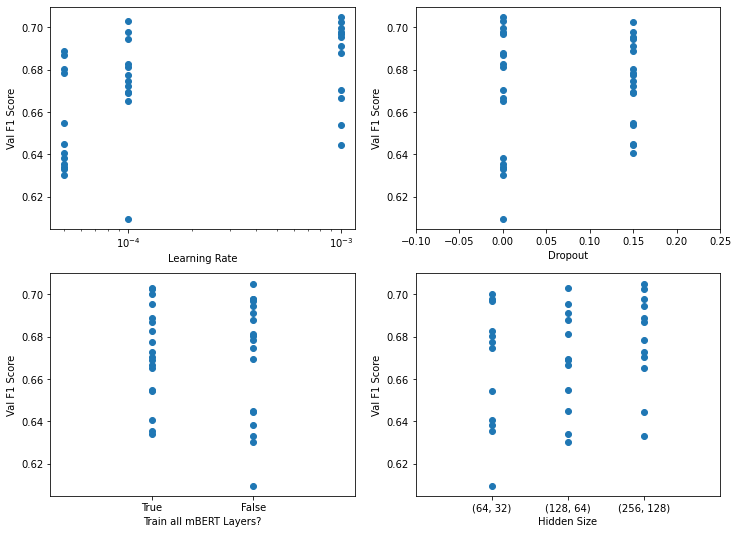

In [ ]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 9))

axes[0][0].scatter(history_df.learning_rate, history_df.val_f1)
axes[0][0].set_xlabel('Learning Rate')
axes[0][0].set_ylabel('Val F1 Score')
axes[0][0].set_xscale("log");

axes[0][1].scatter(history_df.dropout, history_df.val_f1)
axes[0][1].set_xlabel('Dropout')
axes[0][1].set_ylabel('Val F1 Score')
axes[0][1].set_xlim([-.1, .25])


axes[1][0].scatter(history_df.train_all_layer, history_df.val_f1)
axes[1][0].set_xlabel('Train all mBERT Layers?')
axes[1][0].set_ylabel('Val F1 Score')
axes[1][0].set_xticks([-1, 0])
axes[1][0].set_xticklabels(['True', 'False'])
axes[1][0].set_xlim([-2, 1])



hidden_dict = { (64, 32) : 1, 
               (128, 64) : 2, 
               (256,128) : 3 }

axes[1][1].scatter(history_df.hidden_size.apply(lambda x:hidden_dict[x]), history_df.val_f1)
axes[1][1].set_xlabel('Hidden Size')
axes[1][1].set_ylabel('Val F1 Score')
axes[1][1].set_xticks([1, 2, 3])
axes[1][1].set_xticklabels(['(64, 32)', '(128, 64)', '(256, 128)'])
axes[1][1].set_xlim([0, 4])




In [ ]:
history_df.hidden_size

0       (64, 32)
1      (128, 64)
2     (256, 128)
3       (64, 32)
4      (128, 64)
5     (256, 128)
6       (64, 32)
7      (128, 64)
8     (256, 128)
9       (64, 32)
10     (128, 64)
11    (256, 128)
12      (64, 32)
13     (128, 64)
14    (256, 128)
15      (64, 32)
16     (128, 64)
17    (256, 128)
18      (64, 32)
19     (128, 64)
20    (256, 128)
21      (64, 32)
22     (128, 64)
23    (256, 128)
24      (64, 32)
25     (128, 64)
26    (256, 128)
27      (64, 32)
28     (128, 64)
29    (256, 128)
30      (64, 32)
31     (128, 64)
32    (256, 128)
33      (64, 32)
34     (128, 64)
35    (256, 128)
Name: hidden_size, dtype: object

#Previous Code

In [ ]:
classification_model = create_classification_model(optimizer=tf.keras.optimizers.Adam(), 
                                                   train_layers = 0,
                                                   hidden_initializer = 'he_uniform',
                                                   dropout = False
                                                   )
classification_model.summary()

In [ ]:
classification_model = create_classification_model(optimizer=tf.keras.optimizers.Adam(), 
                                                   train_layers = 0,
                                                   hidden_initializer = 'he_uniform',
                                                   dropout = False
                                                   )
classification_model.summary()

In [ ]:
#Define checkpoint directory
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
classification_model.fit([hindi_x_train.input_ids, hindi_x_train.token_type_ids, hindi_x_train.attention_mask],
                         hindi_y_train,
                         validation_data=([hindi_x_dev.input_ids, hindi_x_dev.token_type_ids, hindi_x_dev.attention_mask],
                         hindi_y_dev),
                        epochs=10,
                        batch_size=16,
                         callbacks=[cp_callback])

In [ ]:
# reload saved model
model = create_classification_model(optimizer=tf.keras.optimizers.Adam(), 
                                                   train_layers = 0,
                                                   hidden_initializer = 'he_uniform',
                                                   dropout = False
                                                   )

# Loads the weights
model.load_weights(checkpoint_path)


In [ ]:
predictions = model.predict([hindi_x_dev.input_ids, hindi_x_dev.token_type_ids, hindi_x_dev.attention_mask])

In [ ]:
Analysis = pd.DataFrame(data = {'predicted_prob':predictions.reshape(529,), 'predicted_class':(predictions>0.5).reshape(529).astype(int),'true_class':hindi_y_dev})

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(list(Analysis.true_class), list(Analysis.predicted_class), labels=[0, 1])
print(confusion_matrix)

In [ ]:
Analysis['correct_prediction'] = Analysis.predicted_class == Analysis.true_class

In [ ]:
Analysis.reset_index(drop=True, inplace=True)

In [ ]:
# Correctly classified as toxic with the largest probability
pd.set_option('display.max_colwidth', None)

temp_df = Analysis[(Analysis.correct_prediction==True) & (Analysis.true_class == 1)].nlargest(25, ['predicted_prob'])

pd.concat([hindi_df_dev.iloc[list(temp_df.index)], temp_df[['predicted_prob', 'correct_prediction']]], axis = 1)

In [ ]:
# Correctly classified as non-toxic with the lowest probability (of toxic)
pd.set_option('display.max_colwidth', None)

temp_df = Analysis[(Analysis.correct_prediction==True) & (Analysis.true_class == 0)].nsmallest(25, ['predicted_prob'])

pd.concat([hindi_df_dev.iloc[list(temp_df.index)], temp_df[['predicted_prob', 'correct_prediction']]], axis = 1)

In [ ]:
# incorrectly classified as toxic with the highest probability (of toxic)
pd.set_option('display.max_colwidth', None)


temp_df = Analysis[(Analysis.correct_prediction==False) & (Analysis.true_class == 0)].nlargest(25, ['predicted_prob'])

pd.concat([hindi_df_dev.iloc[list(temp_df.index)], temp_df[['predicted_prob', 'correct_prediction']]], axis = 1)

In [ ]:
# incorrectly classified as non-toxic with the lowest probability (of toxic)
pd.set_option('display.max_colwidth', None)


temp_df = Analysis[(Analysis.correct_prediction==False) & (Analysis.true_class == 1)].nsmallest(25, ['predicted_prob'])

pd.concat([hindi_df_dev.iloc[list(temp_df.index)], temp_df[['predicted_prob', 'correct_prediction']]], axis = 1)

In [ ]:
# Model is unsure, predicted prob is abs(predicted_prob - 0.5)

pd.set_option('display.max_colwidth', None)


temp_df = Analysis.predicted_prob.sub(0.5).abs().nsmallest(25)

pd.concat([hindi_df_dev.iloc[list(temp_df.index)], temp_df], axis = 1).rename(columns={'predicted_prob':'abs(predicted_prob - 0.5)'})


In [ ]:
outputs = mbert_model(hindi_x_dev.input_ids[:5], hindi_x_dev.token_type_ids[:5], hindi_x_dev.attention_mask[:5], output_attentions=True )

In [ ]:
outputs